# Steps of this classification  Model
 **Building A data pipeline**

 **Preprocessing Images for DL**

 **Creating A Deep NN Classifier**

 **Evaluating Model Performance**
 
 **Saving the model for deployment**


# 1 set up and load data

## 1.1 install dependencies and set up

In [1]:
#!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [2]:
!pip list

Package                      Version
---------------------------- --------
absl-py                      2.1.0
aiohttp                      3.9.3
aiosignal                    1.2.0
appnope                      0.1.2
asttokens                    2.0.5
astunparse                   1.6.3
attrs                        23.1.0
blinker                      1.6.2
Brotli                       1.0.9
cachetools                   5.3.3
certifi                      2024.2.2
cffi                         1.16.0
charset-normalizer           2.0.4
click                        8.1.7
comm                         0.2.1
contourpy                    1.2.1
cryptography                 41.0.3
cycler                       0.12.1
debugpy                      1.6.7
decorator                    5.1.1
executing                    0.8.3
flatbuffers                  24.3.25
fonttools                    4.51.0
frozenlist                   1.4.0
gast                         0.4.0
google-auth                  2.6.0
googl

In [3]:
import tensorflow as tf
import os

In [4]:
#Avoid OOM errors by setting GPU memory consumption growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## 1.2 Remove dodgy Images

In [5]:
import cv2
import imghdr

/var/folders/yn/jzzqv3s17t5_glr9g2gqxmyh0000gn/T/ipykernel_1347/4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [6]:
data_dir = '/Users/sadiakhanrupa/Bootcamp Main Phase/dataset_final_project/image_classification_plants'

In [7]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [8]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [9]:
os.listdir(data_dir)

['disease', '.DS_Store', 'no_disease']

In [14]:
for image_class in os.listdir(data_dir):
    print(image_class)

disease
no_disease


In [15]:
os.listdir(os.path.join(data_dir, "disease"))

['images26.jpg',
 'images137.jpg',
 'prevent_houseplant_diseases_effectively.jpg',
 'images136.jpg',
 'images122.jpg',
 'images27.jpg',
 'image18.jpeg',
 '5168-aphids.jpg',
 'how-to-grow-a-healthy-indoor-garden-og.jpg',
 'images134.jpg',
 'images120.jpg',
 'image43.jpeg',
 'ScalesCloseup.jpg',
 'images30.jpg',
 'image14.jpeg',
 'sick-houseplant-brown-spots-yellowed-leaves-selective-focus-indoor-plant-diseases-180055151.jpg',
 'images20.jpg',
 'houseplants_scale_on_schefflera_johnson.jpg',
 'images119.jpg',
 '.DS_Store',
 'Fotolia_70897371_Subscription_Monthly_M-252442.jpg',
 'images130.jpg',
 'images118.jpg',
 'insects.jpg',
 'plant-problems-disease-720x500.jpg',
 'images23.jpg',
 'images126.jpg',
 'images132.jpg',
 'mqpUodGkSPXdrWzvHmNiqL-1200-80.jpg',
 'images133.jpg',
 'Mildew_480x480.jpg',
 '1000_F_470333137_LBZBO5S2fipRxnqZ6W0qtRvy9wMw4C8h.jpg',
 'images92.jpg',
 'images45.jpg',
 'images51.jpg',
 'images154.jpg',
 'images6.jpg',
 'plant-beaucarnea-recurvata-nolina-leaves-have-brow

In [16]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        print(image)

images26.jpg
images137.jpg
prevent_houseplant_diseases_effectively.jpg
images136.jpg
images122.jpg
images27.jpg
image18.jpeg
5168-aphids.jpg
how-to-grow-a-healthy-indoor-garden-og.jpg
images134.jpg
images120.jpg
image43.jpeg
ScalesCloseup.jpg
images30.jpg
image14.jpeg
sick-houseplant-brown-spots-yellowed-leaves-selective-focus-indoor-plant-diseases-180055151.jpg
images20.jpg
houseplants_scale_on_schefflera_johnson.jpg
images119.jpg
.DS_Store
Fotolia_70897371_Subscription_Monthly_M-252442.jpg
images130.jpg
images118.jpg
insects.jpg
plant-problems-disease-720x500.jpg
images23.jpg
images126.jpg
images132.jpg
mqpUodGkSPXdrWzvHmNiqL-1200-80.jpg
images133.jpg
Mildew_480x480.jpg
1000_F_470333137_LBZBO5S2fipRxnqZ6W0qtRvy9wMw4C8h.jpg
images92.jpg
images45.jpg
images51.jpg
images154.jpg
images6.jpg
plant-beaucarnea-recurvata-nolina-leaves-have-brown-spots-dry-leaf-262996213.jpg
les-principales-maladies-des-plantes-626545.png
images7.jpg
images155.jpg
hgic_houseplant_crown_rot_on_Aloe_due_to_over

In [13]:
#to remove .DS_Store
''' 
for item in os.listdir(data_dir):
    # Construct the full path of the item
    item_path = os.path.join(data_dir, item)
    
    # Check if the item is a file and if its name is .DS_Store
    if os.path.isfile(item_path) and item == ".DS_Store":
        # Remove the file
        os.remove(item_path)
'''

In [18]:
img = cv2.imread(os.path.join(data_dir, 'disease','images26.jpg' ))

In [19]:
type(img)

numpy.ndarray

In [20]:
img.shape

(168, 299, 3)

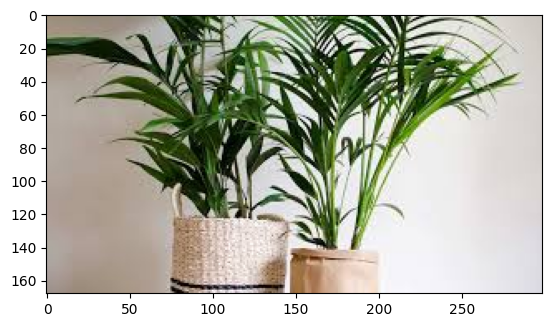

In [25]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [26]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image{}'.format(image_path))


Image not in ext list /Users/sadiakhanrupa/Bootcamp Main Phase/dataset_final_project/image_classification_plants/disease/.DS_Store
Image not in ext list /Users/sadiakhanrupa/Bootcamp Main Phase/dataset_final_project/image_classification_plants/disease/Signs_of_Common_Houseplant_Diseases.jpg
Image not in ext list /Users/sadiakhanrupa/Bootcamp Main Phase/dataset_final_project/image_classification_plants/disease/93914374.jpg
Image not in ext list /Users/sadiakhanrupa/Bootcamp Main Phase/dataset_final_project/image_classification_plants/disease/Houseplants-Common-problems-indoor-plants-face-in-winter-difficult-to-diagnose-1541343.webp
Image not in ext list /Users/sadiakhanrupa/Bootcamp Main Phase/dataset_final_project/image_classification_plants/no_disease/NASA-clean-air-study-18-plants-designboom-600.gif
Image not in ext list /Users/sadiakhanrupa/Bootcamp Main Phase/dataset_final_project/image_classification_plants/no_disease/.DS_Store
Image not in ext list /Users/sadiakhanrupa/Bootcamp M

## 1.3 Load Data

In [27]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [28]:
import numpy as np

In [29]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 415 files belonging to 2 classes.


In [31]:
data_iterator = data.as_numpy_iterator()

In [38]:
#get another batch from itearator
batch = data_iterator.next()

In [39]:
#images representes as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [40]:

batch[1]

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int32)

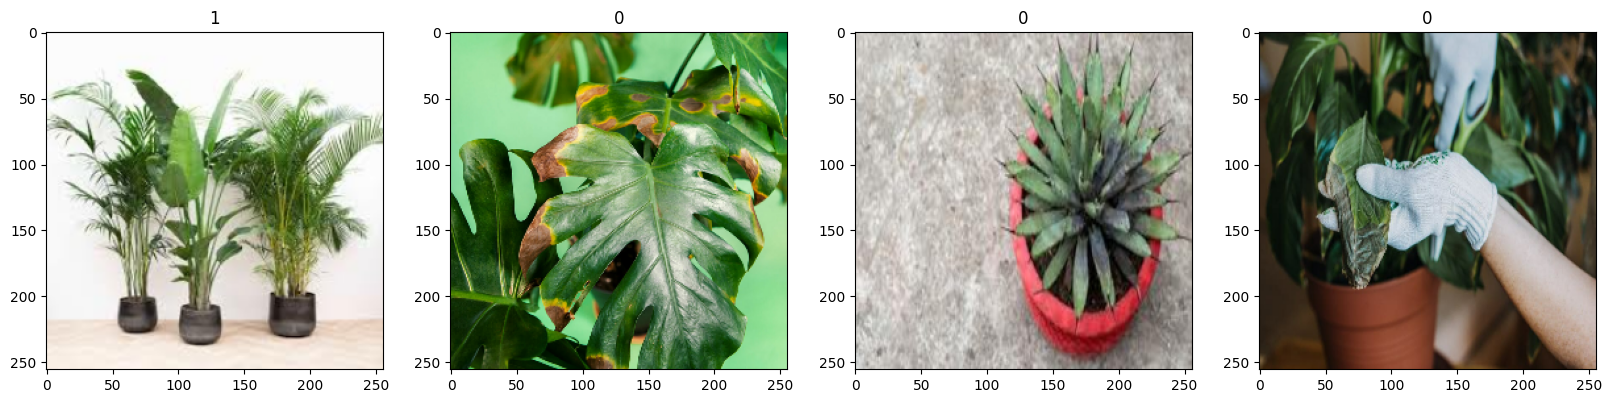

In [44]:
# 0 = disease
# 1 = no disease
fig, ax = plt.subplots(ncols=4, figsize= (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 2 Preprocess Data

In [50]:
scaled = batch[0]/255

In [52]:
scaled.min()

0.0

In [53]:
scaled.max()

1.0

## 2.1 Scale Data

In [54]:
data = data.map(lambda x,y: (x/255, y))

In [60]:
scaled_iterator = data.as_numpy_iterator()

In [66]:
batch = scaled_iterator.next()

In [69]:
batch[0].max()

1.0

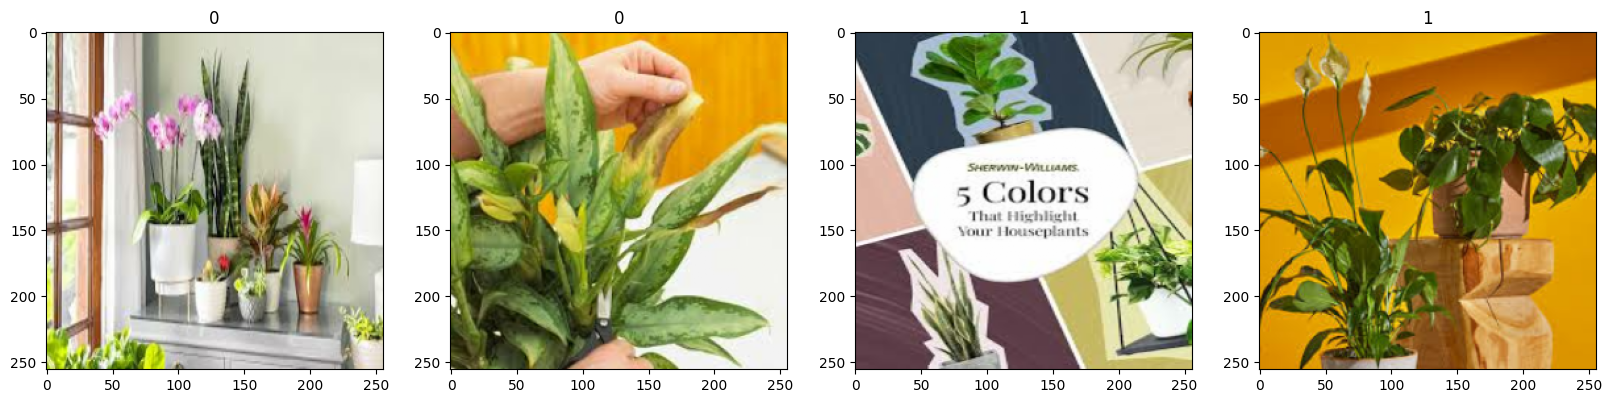

In [68]:
# 0 = disease
# 1 = no disease
fig, ax = plt.subplots(ncols=4, figsize= (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## 2.2 Split data

In [70]:
len(data)

13

In [78]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [79]:
print(train_size)
print(val_size)
print(test_size)

9
2
2


In [80]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)